# Opdracht 18

Train a decision tree to predict one of the numerical columns of your own dataset.

- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to schoose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set
- Calculate the RMSE for both the train set and test set predictions
- Is the RMSE different? DId you expect this difference
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree

In [1]:
import pandas as pd

import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
grades = pd.read_csv("StudentsPerformance.csv")

In [3]:
sp_train, sp_test = train_test_split(grades, test_size=0.3)

sp_train = sp_train.dropna()
sp_test = sp_test.dropna()

In [4]:
features = ["writing score"]
dt = DecisionTreeRegressor(max_depth = 5)
dt.fit(sp_train[features], sp_train["reading score"])

DecisionTreeRegressor(max_depth=5)

In [5]:
predictions_train = dt.predict(sp_train[features])
predictions_test = dt.predict(sp_test[features])

In [6]:
def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names = features,
                                   filled=True, rounded = True,
                                   special_characters = True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

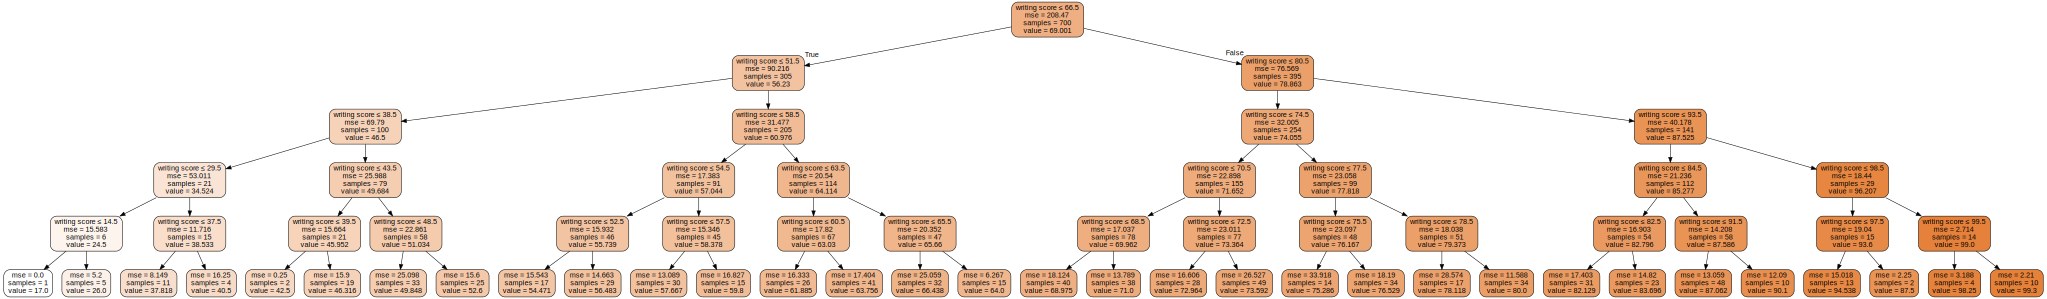

In [7]:
plot_tree_regression(dt, features)

In [8]:
 def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exeption("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [9]:
rmseTrain = calculate_rmse(predictions_train, sp_train['reading score'])
rmseTest = calculate_rmse(predictions_test, sp_test['reading score'])

print("RMSE of the train set: " + str(rmseTrain))
print("RMSE of the test set: " + str(rmseTest))

RMSE of the train set: 4.126505331511295
RMSE of the test set: 4.724507587389437


Er is een standaardafwijking van 0.5 te zien. Dit verschil is enorm klein.